# Heart disease prediction

'Author' : [junaid Amin](https://twitter.com/juneedpk)

'Date' : 18-03-24

'Dataset' : [Heart Disease UCI](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

# Meta Data

## ABOUT DATA
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content
### Column Descriptions:
* 'id' (Unique id for each patient)
* 'age'(Age of the patient in years)
* o'rigin' (place of study)
* 'sex' (Male/Female)
* 'cp chest pain type' 
    1. typical angina
    2. atypical angina
    3. non-anginal
    4. asymptomatic
* 'trestbps resting blood pressure' (resting blood pressure (in mm Hg on admission to the hospital))
* 'chol' (serum cholesterol in mg/dl)
*' fbs'(if fasting blood sugar > 120 mg/dl)
* 'restecg '(resting electrocardiographic results)
* -- 'Values': [normal, stt abnormality, lv hypertrophy]
* 'thalach': maximum heart rate achieved
* 'exang': exercise-induced angina (True/ False)
*' oldpeak': ST depression induced by exercise relative to rest
* 'slope': the slope of the peak exercise ST segment
* 'ca': number of major vessels (0-3) colored by fluoroscopy
* 'thal': [normal; fixed defect; reversible defect]
* 'num': the predicted attribute
### Acknowledgements
Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

## Aims and Objectives

we will do this after EDA

### Import Libraries 

Lets start the project by importing libraries

In [277]:
# to import the data
import pandas as pd
import numpy as np

# to plot the data
import matplotlib.pyplot as plt
import plotly.express as px

# to process the data
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# metrices

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

### Load the Dataset

In [278]:
df = pd.read_csv('heart_disease.csv' )

df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [280]:
df.shape

(920, 16)

In [281]:
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

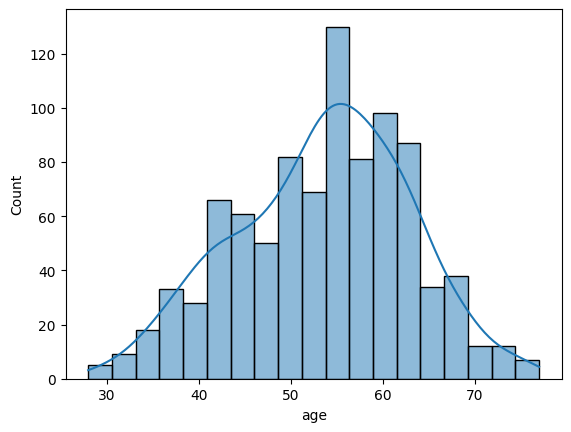

In [282]:
sns.histplot(df['age'], kde=True)

In [283]:
fig = px.histogram(df, x="age",color='sex',title='Age distribution vs sex')
fig.show()

In [284]:
df.groupby('sex')['age'].size()

sex
Female    194
Male      726
Name: age, dtype: int64

In [285]:
df.groupby('sex')['age'].size() / df.shape[0] * 100

sex
Female    21.086957
Male      78.913043
Name: age, dtype: float64

In [286]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [287]:
df.groupby('dataset')['sex'].value_counts()

dataset        sex   
Cleveland      Male      207
               Female     97
Hungary        Male      212
               Female     81
Switzerland    Male      113
               Female     10
VA Long Beach  Male      194
               Female      6
Name: count, dtype: int64

<Axes: xlabel='dataset', ylabel='count'>

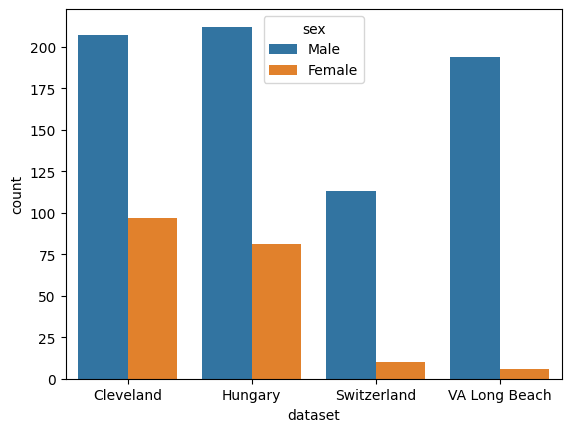

In [288]:
sns.countplot(x='dataset',data=df,hue='sex')

In [289]:
fig = px.bar(df, x='dataset', color='sex', title='Countplot of Sex by Dataset')
fig.show()


In [290]:
fig = px.histogram(df, x="age",color='dataset',title='Age distribution vs dataset')
fig.show()

In [291]:
print('mean of dataset',df.groupby('dataset')['age'].mean())
print('--------------------------------')
print('median of dataset',df.groupby('dataset')['age'].median())
print('--------------------------------')
print('mode of dataset',df.groupby('dataset')['age'].agg(lambda x: x.mode().iloc[0]))


mean of dataset dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
--------------------------------
median of dataset dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
--------------------------------
mode of dataset dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


### Lets explore the cp (chest pain) data.

In [292]:
df['cp'].value_counts() 

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: ylabel='cp'>

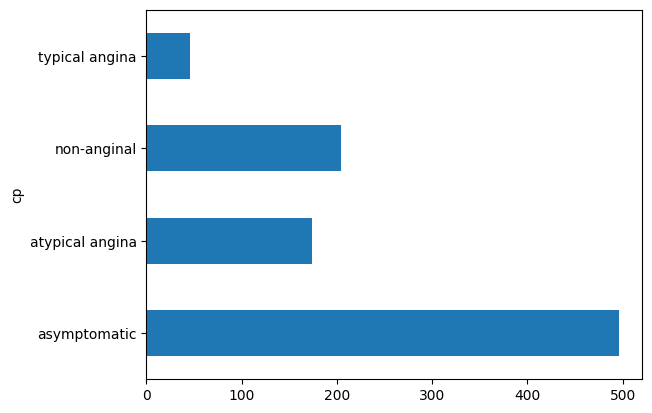

In [293]:
df.groupby('cp')['age'].size().plot(kind='barh')

<Axes: xlabel='cp', ylabel='count'>

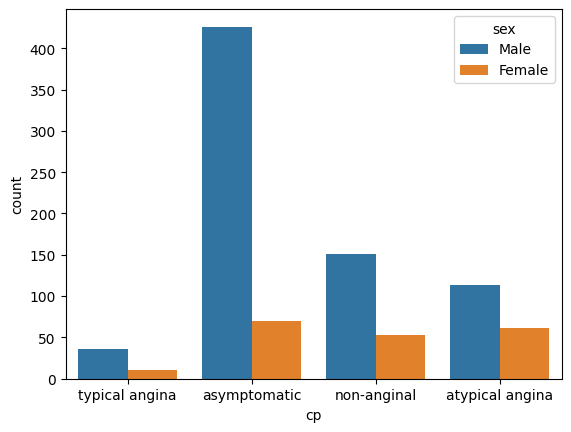

In [294]:
sns.countplot(x='cp',data=df,hue='sex')

<Axes: xlabel='cp', ylabel='count'>

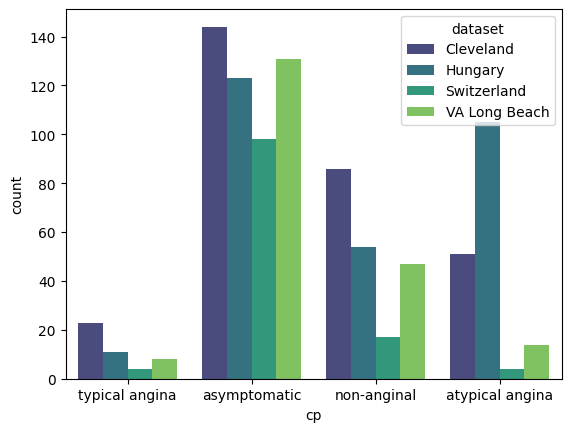

In [295]:
sns.countplot(x='cp',data=df,hue='dataset',palette='viridis')


#### Lets explore the trestbps (resting blodd pressure) column:

The normal resting blood pressure is 120/80 mm Hg

In [296]:
df['trestbps'].describe()   

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

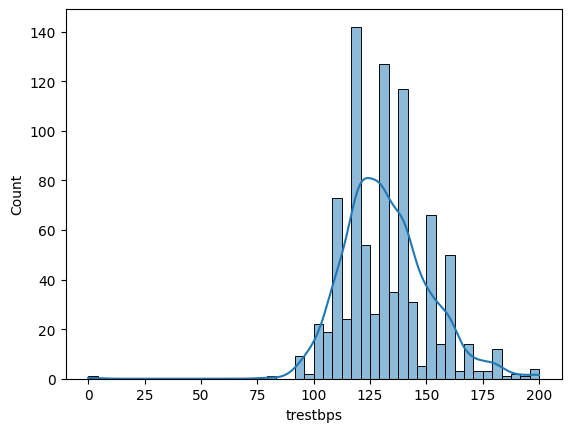

In [297]:
sns.histplot(df['trestbps'], kde=True)

In [298]:
# checking missing value percentage
print('the perecentage of missing values in trestbps is',df['trestbps'].isnull().sum()/df.shape[0] * 100)


the perecentage of missing values in trestbps is 6.41304347826087


In [299]:
# Lets check  other missing values columns and impute them also

(df.isnull().sum()/df.shape[0] * 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

### Lets impute missing values in data using ML models:


In [300]:
# we are going to make function to deal with missing values with object data type
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols


['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [301]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']


In [302]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [303]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)


ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [304]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.223294797687862 

RMSE = 16.988968045767688 

R2 = 0.09881947840549032 

Missing Values chol : 3.26%
MAE = 45.06398876404494 

RMSE = 64.02732192877339 

R2 = 0.6752498805903785 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values thalch : 5.98%
MAE = 16.581676300578035 

RMSE = 21.688073265399073 

R2 = 0.3160391286411721 

Missing Values exang : 5.98%


The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5675523255813953 

RMSE = 0.785506454165008 

R2 = 0.4121622648229606 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [305]:
df.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### Dealing with Outliers in the data

In [306]:
# creating boxplot on all numeric columns using plotly

import plotly.express as px

# Selecting only the numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']
numerical_data = df[numerical_cols]

# Creating the boxplot
fig = px.box(numerical_data, title='Boxplot of Numerical Columns')
fig.show()



In [307]:
# print the row where trestbps value is 0
df[df['trestbps'] == 0]
# removing the row from dataset
df = df[df['trestbps'] != 0]

In [308]:
# print the row where chol value is 0
df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,125.17,0.0,False,normal,130.00,True,0.862,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.0,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,147.03,0.0,False,lv hypertrophy,119.19,True,2.236,downsloping,0.0,reversable defect,1


### Applying Machine learning models

### The predicted value in this data is `num` column through which we predict heart disease.The unique values in `num` column
 are :[0,1,2,3,4]
1.  `0 = No heart disease`
 2. `1 = mild heart disease`
 3. `2 = moderate heart disease`
 4. `3 = severe heart disease`
 5. `4 = critical heart disease`

In [309]:
#spliting data in to x and y
x = df.drop('num', axis=1)
y = df['num']

#label encoing the dataset
label_encoder = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object'or x[col].dtype == 'category':
        x[col] = label_encoder.fit_transform(x[col])

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [310]:
# lets import our calssification or multi calss classification models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#metrices
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [318]:
# lets create a list of models to evaluate

models = [LogisticRegression(random_state=42),SVC(random_state=42),DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42),AdaBoostClassifier(random_state=42),GradientBoostingClassifier(),KNeighborsClassifier(),
          XGBClassifier(),GaussianNB()]


best_model = None
best_accuracy = 0

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
    else:
        pass

# PRINT BEST MODEL
print('Best model is',best_model,'with accuracy of',best_accuracy)
# printin the cross validation score
print('cross validation score of best model is',cross_val_score(best_model,x,y,cv=5).mean())

Best model is GradientBoostingClassifier() with accuracy of 0.6793478260869565
cross validation score of best model is 0.44369802803516273


In [317]:
#import model in pickle
import pickle
pickle.dump(best_model,open('heart_disease.pkl','wb'))


### output
1. The minium `age` for heart attack starts from 28 according to this dataset.
2. The maximum range of `age` for heart attack is between 54-55.
3. The maximum count for female is 22 while male have maximum count of 70 at age of 54-55
4. The females have 21% size and males have 72% size in dataset.
5. The cleveland have highest number of patients(304) and switzerland lowest(123).
     1. The hungary had high male patients(212) and switzerland had lowest(113).
     2. The cleveland had highest female patients(97) and VA long beach had lowest(6).
6. The dataset summarizes mean, median, and mode values for four locations: Cleveland, Hungary, Switzerland, and VA Long Beach. Mean values range from around 47.89 to 59.35, median values from 49.0 to 60.0, and mode values vary between 54 and 62, offering insights into the central tendencies across these locations.
7. According to chest pain column(`cp`),asymptomatic cases had highest count(496) while typical angina cases are 46.
8. Imputing the missing values in data using machine learning model so that no column contains missing values.
9. then we will check outliers and remove one outlier from `trestbsp` as its value cant be 0. we will leave the `chol` 171 rows beacuse it contain 0 value of `chol`.
10. Load all machine learning models to test and evaulate best machinelearning model and save the model for future predictions or deployment.